## Inport Libs

In [27]:
import sys; sys.path.append("..")

from shapely.geometry import Point, LineString

from src.parsing.google_earth_parser import GoogleEarthParser
from src.fleet import Fleet

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parse our KML File

2022-04-20 13:15:52,252 : INFO -  # [GoogleEarthParser] get_parcels


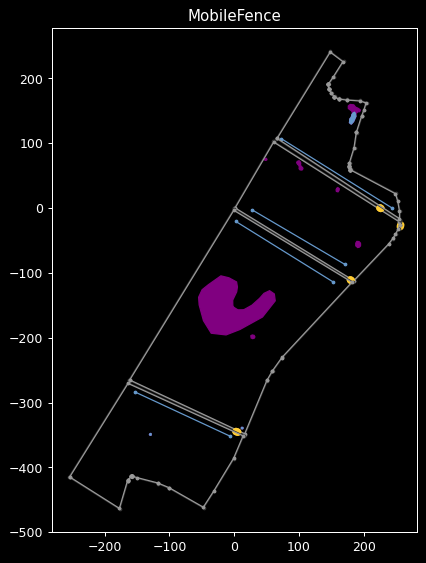

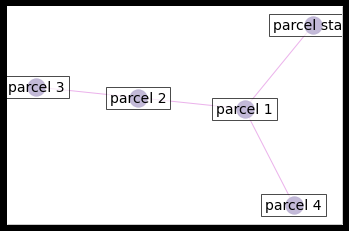

In [28]:
parser = GoogleEarthParser(workdir="../prod")
parcel_group = parser.get_parcel_group("../prod/MobileFence.kml")
parcel_group.clean_obstacles()
parcel_group.plot_parcels()
parcel_group.plot_graph()

## Let's choose a watertank position

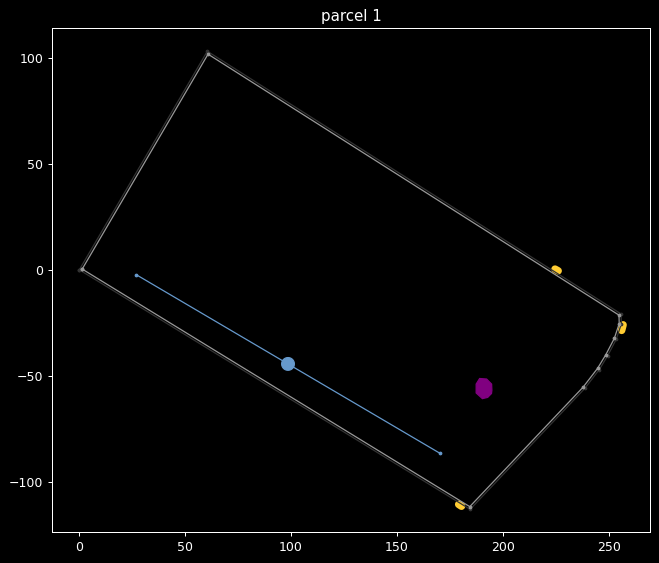

In [36]:
parcel_1 = parcel_group.dict_parcel["parcel 1"]
# let's place the water tank at the center of the sweep axis
parcel_1.water_tanks = [parcel_1.ls_sweep_axis.centroid.buffer(3)] 
# let's also take only the first obstacle for demo purposes
parcel_1.obstacles = parcel_1.obstacles[:1]
parcel_1.plot()

## Run algo

2022-04-20 13:19:31,724 : INFO -  # [Fleet] forward
2022-04-20 13:19:31,725 : INFO -  # [Sequence] scan of parcel 1
 92%|█████████████████████████████████████████████████████████▉     | 92/100 [00:01<00:00, 70.26it/s]
2022-04-20 13:19:33,041 : INFO -  # [Sequence] interpolate front of parcel 1
100%|███████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 101.82it/s]
2022-04-20 13:19:33,288 : INFO -  # [Fleet] Got 1 obstacle(s)
2022-04-20 13:19:33,351 : INFO -  # [Fleet] Linear smoothing of small obstacle
2022-04-20 13:19:33,368 : INFO -  # [Sequence] Smoothing angle found: 25


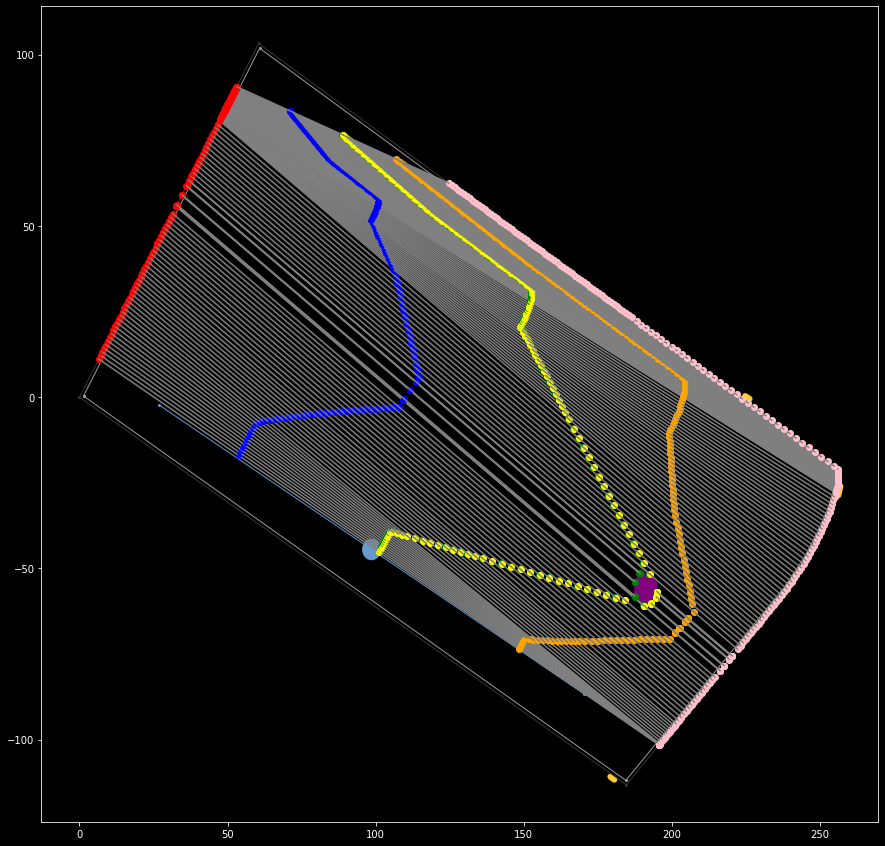

In [37]:
fleet = Fleet("../prod")
fleet.forward(parcel_1)
fleet.plot()

## Make gif

In [ ]:
fleet.make_gif()

## Visualize Sequence

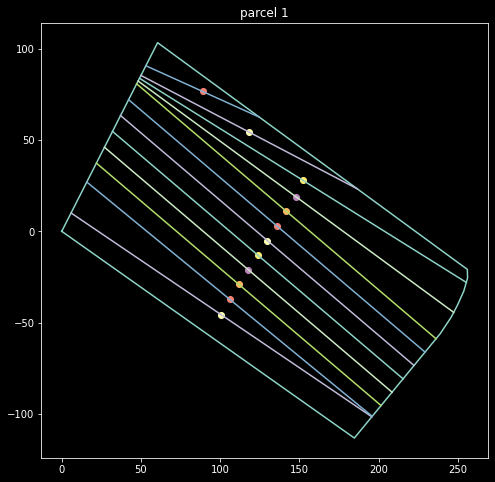

In [15]:
fleet.sequence.plot(False)